**#STUDENT PERFORMANCE ANALYSIS SYSTEM**

## *Introduction*

This project focuses on analyzing student academic performance using Python and data analysis techniques.  
The main goal of this project is to understand how students are performing in different subjects and to identify top performers as well as students who need improvement.

We analyze the dataset using *Pandas, NumPy, and Matplotlib* and try to answer important questions such as:
- Who are the top performing students?
- Which subject has better or worse performance?
- Does attendance affect marks?

## *Dataset Creation and Loading*

Since real student data is not available, we generated a synthetic (fake) dataset using NumPy and Pandas.  
The dataset contains the following columns:

- StudentID  
- Name  
- Subject  
- Marks  
- Attendance  

The generated dataset is saved as a CSV file and then loaded again to simulate a real-world data analysis workflow.

In [14]:
import pandas as pd
import numpy as np
np.random.seed(42)
students=[]
names = ["Amit", "Riya", "Pooja", "Rahul", "Neha", "Sanjay", "Kiran", "Sneha", "Arjun", "Priya"]
subjects = ["Maths", "Science", "English"]
for i in range (1,51):
    name=np.random.choice(names)
    subject=np.random.choice(subjects)
    marks=np.random.randint(30,100)
    attendence=np.random.randint(60,100)
    students.append([i,name,subject,marks,attendence])
df=pd.DataFrame(students,columns=["StudentID","Name","Subject","marks","Attendence"])
df.head()
df.to_csv("students.csv",index=False)




## *Data Exploration*

In this step, we explore the dataset to understand its structure, number of rows, number of columns, and the type of data present.  
This helps in verifying whether the data is loaded correctly and is ready for analysis.

In [31]:
df.head
df.shape

(50, 6)

In [40]:
import pandas as pd
df=pd.read_csv("students.csv")


In [32]:
df["marks"].mean()

63.1

## *Top Performers Analysis*

In this section, we identify the students who have scored the highest marks.  
This helps in understanding who the best performing students are in the class.

In [34]:
df.sort_values(by="marks",ascending=False).head(5)

,StudentID,Name,Subject,marks,Attendence,Result
40,41,Arjun,English,99,67,Pass
48,49,Sanjay,English,97,70,Pass
3,4,Sanjay,Science,93,80,Pass
6,7,Pooja,English,93,62,Pass
36,37,Priya,Maths,91,65,Pass


## *Weak Students Identification*

In this section, we identify students who have scored the lowest marks.  
This helps in finding students who may need extra academic support or improvement.

In [52]:
df.sort_values(by="marks").head(5)

,StudentID,Name,Subject,marks,Attendence
46,47,Riya,Science,30,78
2,3,Sanjay,Maths,31,83
44,45,Kiran,Science,32,96
12,13,Amit,Science,33,61
13,14,Sanjay,Science,33,88


## *Subject-wise Performance Analysis*

Here, we analyze the average marks for each subject.  
This helps in understanding which subject is performing better and which subject may require more focus.

In [33]:
df.groupby("Subject")["marks"].mean()

Subject
English    64.352941
Maths      65.375000
Science    59.705882
Name: marks, dtype: float64

In [35]:

df.sort_values(by="marks").head(5)

,StudentID,Name,Subject,marks,Attendence,Result
46,47,Riya,Science,30,78,Fail
2,3,Sanjay,Maths,31,83,Fail
44,45,Kiran,Science,32,96,Fail
12,13,Amit,Science,33,61,Fail
13,14,Sanjay,Science,33,88,Fail


In [36]:
df[df["Attendence"]<75]

,StudentID,Name,Subject,marks,Attendence,Result
0,1,Kiran,Maths,44,67,Pass
1,2,Neha,English,53,62,Pass
6,7,Pooja,English,93,62,Pass
8,9,Arjun,English,47,63,Pass
10,11,Neha,Science,89,66,Pass
11,12,Sneha,English,64,73,Pass
12,13,Amit,Science,33,61,Fail
26,27,Sanjay,English,64,60,Pass
27,28,Pooja,Maths,76,73,Pass
34,35,Rahul,Maths,61,66,Pass


## *Pass / Fail Classification*

We classify students as *Pass* or *Fail* based on their marks.  
If a student scores 40 or more, they are marked as Pass, otherwise Fail.  
This helps in quickly identifying students who did not meet the minimum criteria.

In [37]:
df["Result"]=df["marks"].apply(lambda x:"Pass" if x>=40 else "Fail")
df.head()

,StudentID,Name,Subject,marks,Attendence,Result
0,1,Kiran,Maths,44,67,Pass
1,2,Neha,English,53,62,Pass
2,3,Sanjay,Maths,31,83,Fail
3,4,Sanjay,Science,93,80,Pass
4,5,Amit,Science,51,84,Pass


In [43]:
df.to_csv("students_final_csv",index=False)


## *Data Visualization*

In this section, we use different charts such as:
- Histogram for marks distribution  
- Bar chart for subject-wise average marks  
- Scatter plot for attendance vs marks  

These visualizations help in understanding the data more clearly and intuitively.

**MARKS DISTRIBUTION CHART**

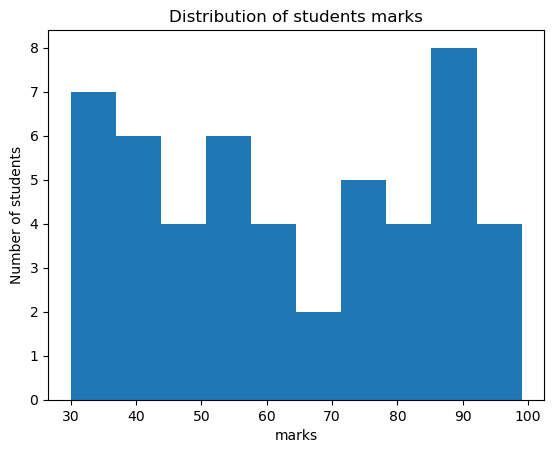

In [42]:
import matplotlib.pyplot as plt
plt.hist(df["marks"],bins=10)
plt.title("Distribution of students marks")
plt.xlabel("marks")
plt.ylabel("Number of students")
plt.show()
           

**SUBJECT WISE AVERAGE MARKS ( BAR CHART )**

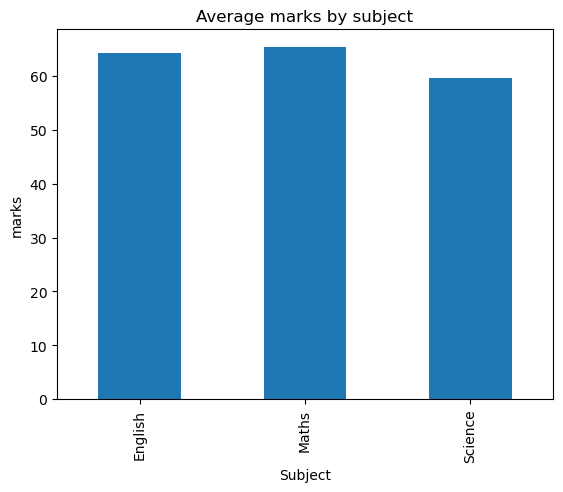

In [47]:
df.groupby("Subject")["marks"].mean().plot(kind="bar")
plt.title("Average marks by subject")
plt.xlabel("Subject")
plt.ylabel("marks")
plt.show()

**ATTENDENCE VS MARKS ( SCATTER PLOT )**

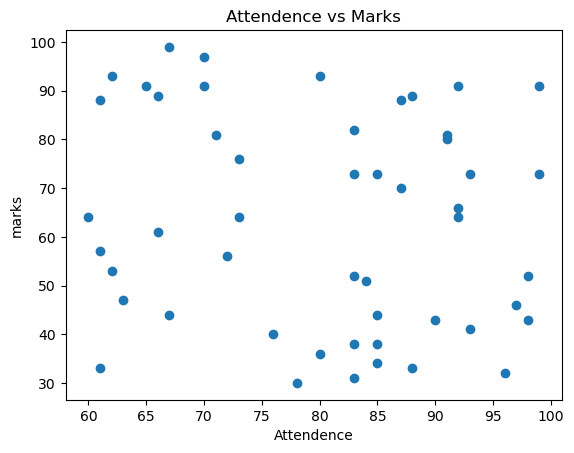

In [50]:
plt.scatter(df["Attendence"], df["marks"])
plt.title("Attendence vs Marks")
plt.xlabel("Attendence")
plt.ylabel("marks")
plt.show()

## *Conclusion*

- The analysis shows the overall performance of students in different subjects.
- Subject-wise comparison helps identify which subjects are stronger or weaker.
- The scatter plot between *attendance and marks* suggests that students with better attendance generally perform better.
- The project successfully identifies *top performers* and *students who need improvement*.
- This project demonstrates how *Python, Pandas, and data analysis techniques* can be used to analyze academic performance.

In [53]:
import sqlite3

In [54]:
conn=sqlite3.connect("student.db")

In [55]:
import pandas as pd
df=pd.read_csv("students.csv")
df.head()

,StudentID,Name,Subject,marks,Attendence
0,1,Kiran,Maths,44,67
1,2,Neha,English,53,62
2,3,Sanjay,Maths,31,83
3,4,Sanjay,Science,93,80
4,5,Amit,Science,51,84


In [56]:
df.to_sql("students",conn,if_exists="replace",index=False)

50

In [57]:
pd.read_sql("SELECT * FROM students LIMIT 5 " , conn )

,StudentID,Name,Subject,marks,Attendence
0,1,Kiran,Maths,44,67
1,2,Neha,English,53,62
2,3,Sanjay,Maths,31,83
3,4,Sanjay,Science,93,80
4,5,Amit,Science,51,84
